# Multilayer Perceptron - MNIST Dataset

A presentation of this dataset together with an exploratory analysis has been done already in another notebook of this repository (click here to access it: [An Unsupervised Approach to MNIST](https://github.com/LeviGuerra/Machine-Learning-Portfolio/blob/master/Codes_and_Datasets/06_An-Unsupervised-Approach-to-MNIST.ipynb)).

This time, deep learning in the shape of multilayer perceptrons (MLPs) is the chosen classification technique. Different types of architechtures and optimizers will be used.

### Table of Contents
- [0. Loading the Dataset](#0.-Loading-the-Dataset)
- [1. MLP - Adadelta Optimizer](#1.-MLP---Adadelta-Optimizer)
    - [1.1 No-Hidden-Layer Network](#1.1-No-Hidden-Layer-Network)
    - [1.2 3-Layers Network](#1.2-3-Layers-Network)
- [2. MLP - Stochastic Gradient Descent](#2.-MLP---Stochastic-Gradient-Descent)
    - [2.1 No-Hidden-Layer Network](#2.1-No-Hidden-Layer-Network)
    - [2.2 3-Layers Network](#2.2-3-Layers-Network)
- [3. Visualizing Results](#3.-Visualizing-Results)
    - [3.1 Visualizing the Classification](#3.1-Visualizing-the-Classification)
    - [3.2 Visualizing the Errors](#3.2-Visualizing-the-Errors)

## 0. Loading the Dataset

In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Activation , Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

mnist = pd.read_csv("Datasets/MNIST.csv", header=None)
mnist = np.array(mnist)

X = mnist[:,1:] / 255   # Normalizing our data
Y = mnist[:,0]          
oneY = to_categorical(Y)

## 1. MLP - Adadelta Optimizer

###  1.1 No-Hidden-Layer Network

To test the accuracy of the simplest architecture, we build a network with no hidden layer. **Hidden Layers** refer to the intermediate layers between input and output layers. They are capable of finding more complex features of the data, and thus, make a finer classification.

Still, for this case the accuracy is surprisingly high and the training time short. We include plots of the temporal evolution of loss and accuracy.

In [2]:
import time
start = time.time()

X_train,X_test,Y_train,Y_test = train_test_split(X,oneY,test_size=0.3)

model = keras.Sequential()
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', 
             optimizer=keras.optimizers.Adadelta(), 
             metrics=['accuracy'])

arr = model.fit(X_train, Y_train,  
         batch_size=1024,  
         epochs=200,  
         verbose=0,  # Verbosity mode. 0 = silent
         validation_data=(X_test, Y_test))  

score = model.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1],'\n')
model.summary()

Time spent to train the network: 43.4 seconds

Test loss: 0.29422922897338866
Test accuracy: 0.9156666666666666 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


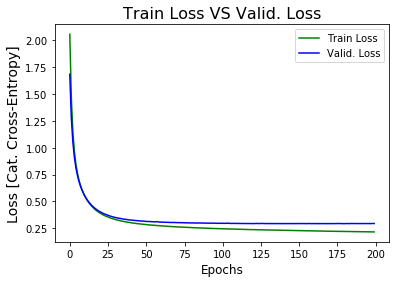

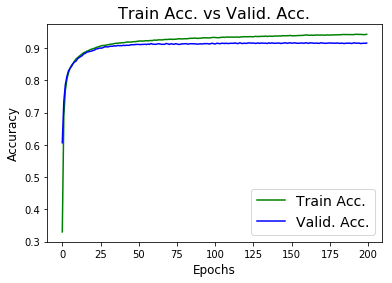

In [3]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr.history['loss'][:],     c="green")
plt.plot(arr.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr.history['acc'][:],     c="green")
plt.plot(arr.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 1.2 3-Layers Network

Now, keeping all other parameters identical, three layers will be added to the architechture. As it can be seen, the accuracy increases considerably: more complex and abstract features are coded in the deep layers.

In [18]:
import time
start = time.time()

X_train,X_test,Y_train,Y_test = train_test_split(X,oneY,test_size=0.3)

model2 = keras.Sequential()
model2.add(Dense(128, input_shape=(784,), activation="relu"))
model2.add(Dropout(0.2))  
model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss='categorical_crossentropy',  
             optimizer=keras.optimizers.Adadelta(),  
             metrics=['accuracy'])

arr2 = model2.fit(X_train, Y_train,  
         batch_size=1024,         
         epochs=200,  
         verbose=0,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
         validation_data=(X_test, Y_test))  

score2 = model2.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1],'\n')
model2.summary()

Time spent to train the network: 63.98 seconds

Test loss: 0.13888034101897695
Test accuracy: 0.9703333333333334 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                330       
Total params: 111,146
Train

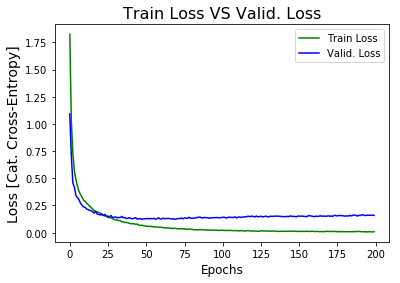

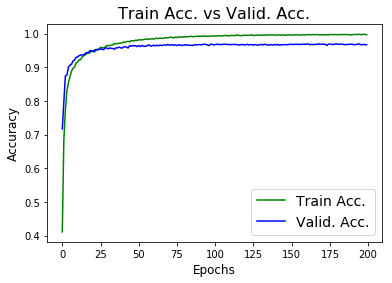

In [5]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr2.history['loss'][:],     c="green")
plt.plot(arr2.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr2.history['acc'][:],     c="green")
plt.plot(arr2.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 2. MLP - Stochastic Gradient Descent

### 2.1 No-Hidden-Layer Network

In [6]:
model3 = tf.keras.Sequential()
model3.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model3.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',            
              metrics=['accuracy'])       


arr3 = model3.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 verbose=0,
                 epochs=200)

score3 = model3.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1],'\n')
model3.summary()

Time spent to train the network: 151.76 seconds

Test loss: 0.3218205799857775
Test accuracy: 0.911 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


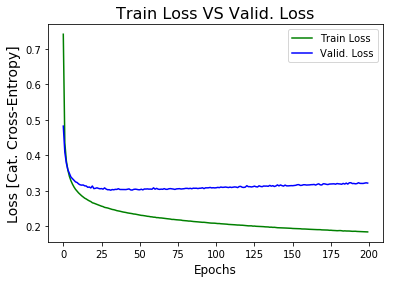

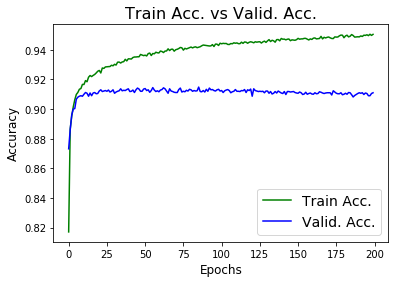

In [7]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr3.history['loss'][:],     c="green")
plt.plot(arr3.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr3.history['acc'][:],     c="green")
plt.plot(arr3.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 2.2 3-Layers Network

In [8]:
model4 = tf.keras.Sequential()
model4.add(Dense(128, activation='relu'))
# Add another:
model.add(Dropout(0.2))
model4.add(Dense(64,  activation='relu'))
# Add another:
model4.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model4.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model4.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',            
              metrics=['accuracy'])       


arr4 = model4.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 verbose=0,
                 epochs=200)

score4 = model4.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score4[0])
print('Test accuracy:', score4[1],'\n')
model4.summary()

Time spent to train the network: 315.04 seconds

Test loss: 0.2040079059437218
Test accuracy: 0.9666666666666667 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  100480    
_________________________________________________________________
dense_7 (Dense)              multiple                  8256      
_________________________________________________________________
dense_8 (Dense)              multiple                  2080      
_________________________________________________________________
dense_9 (Dense)              multiple                  330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


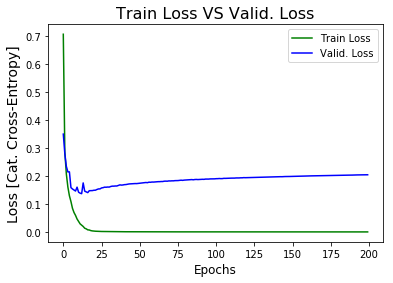

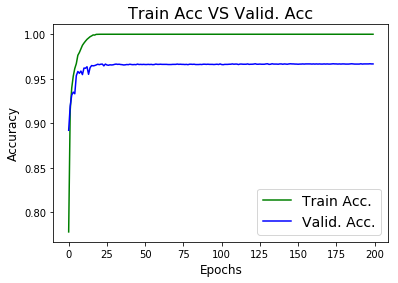

In [9]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr4.history['loss'][:],     c="green")
plt.plot(arr4.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc VS Valid. Acc",fontsize=16)
plt.plot(arr4.history['acc'][:],     c="green")
plt.plot(arr4.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 3. Visualizing Results

### 3.1 Visualizing the Classification

Now that the accuracy values have been acquired, finding in model2 from [Section 1.2](#1.2-3-Layers-Network) with adadelta optimizer the best model with a **97.03% accuracy**, we can visualize how our network classifies.  

In order to do so, we will take the entire dataset and label the diferent elements according to the network output. Afterwards, we will average all images with the same label. The result is quite ashtonishing and can be seen in the following image.

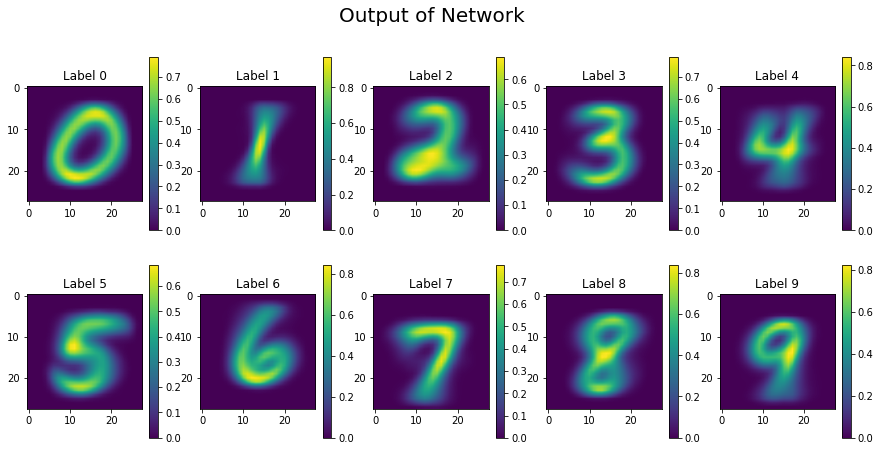

In [10]:
Yp=[]
for i in range(np.shape(X)[0]):
  yp=model2.predict(X[i:i+1,:])
  Yp.append(np.argmax(yp))
Yp=np.array(Yp)

fig=plt.figure(figsize=(15,7))

for i in range(10):
  labeled = X[Yp==i,:]
  meanlabeled=[np.mean(labeled[:,i]) for i in range(np.shape(X)[1])]
  meanlabeled=np.array(meanlabeled)
  ax1 = fig.add_subplot(2,10/2,i+1)
  plt.imshow(meanlabeled.reshape(28,28),cmap='viridis',interpolation='bilinear')
  plt.title('Label '+str(i))
  plt.colorbar()
plt.suptitle('Output of Network',fontsize=20)
plt.show()

### 3.2 Visualizing the Errors

Of course, the network does not have a 100% accuracy. But, are the errors reasonable? Could a human also fail in some of these digits? Let us take 100 random digits and see what the network guesses wrong.

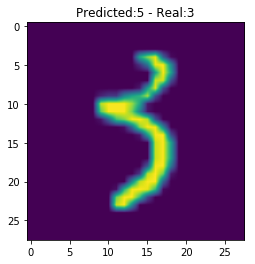

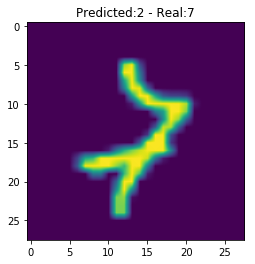

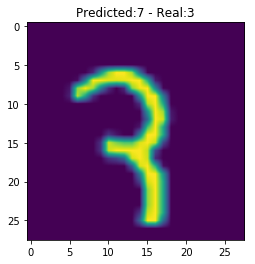

In [28]:
import numpy.random

# Predict labels of 100 random instances
idxs = np.random.choice(X_test.shape[0], 100, replace=False)
lbls = np.argmax(model.predict(X_test[idxs,:]), axis=1)

# Find the wrong ones
wrong = idxs[np.argmax(Y_test[idxs], axis=1) != lbls] 

for i in wrong: 
  plt.imshow(X_test[i,:].reshape(28, 28),interpolation='bilinear',cmap='viridis')
  plt.title("Predicted:" + str(np.argmax(model.predict(X_test[i:i+1,:]))) + " - Real:" + str(np.argmax(Y_test[i:i+1,:])))
  plt.show()

As it can be seen, these errors are quite reasonable; even a human might fail in some of them. Still, the architechture can be improved and made more complex. We will explore further improvements in upcoming works.